In [1]:
from imports import *

In [2]:
Video('../data/tennis.mp4', width=800)

In [3]:
#export

import numpy as np

def read_video_tensor(file, probe_i=1):
    """
    Read a file as a 4D numpy tensor with shape (T,H,W,C) (T=num_frames)
    
    Parameters
    ----------
    filename : str
        Path to the video file
        
    probe_i : int
        Index of `ffmpeg.probe(file)['streams']` to extract the video's
        height and width. Usually works as `1` but if the file has no
        audio, you might need to use `0`.
        
    """
    import ffmpeg
    import torch

    out, _ = (
        ffmpeg
        .input(file)
        .output('pipe:', format='rawvideo', pix_fmt='rgb24')
        .run(capture_stdout=True)
    )

    meta = ffmpeg.probe(file)['streams'][probe_i]
    height, width = meta['height'], meta['width']
    #height, width = 900, 1600

    vid = (
        np
        .frombuffer(out, np.uint8)
        .reshape([-1, height, width, 3])
    )

    return torch.from_numpy(vid)

In [4]:
video = read_video_tensor('../data/tennis.mp4')
video.shape

torch.Size([42, 1080, 1920, 3])

In [5]:
#export

def subplot_img(sub_plt, x, i, prefix):
    """
    Plot one frame of a 4D video tensor.
    Removes axes and prints Frame # for aesthetic peace of mind
    
    Parameters
    ----------
    
    sub_plt : matplotlib.figure.Figure
        One subplot of `plt.subplots`
    
    x : 4D torch.Tensor or np.array
        Must be of shape (T, H, W, C) (T = num frames)
        
    i : int
        Frame no. that is to be plotted
        
    """
    sub_plt.imshow(x[i])
    sub_plt.set_title(f'{prefix}Frame #{i+1}')
    sub_plt.axis('off')

In [6]:
#export
import matplotlib.pyplot as plt

def plot_adjacent(x, prefix='', i=0, j=31, figsize=(16,10)):
    """
    Plot 2 frames of a 4D video tensor/array side by side
    
    Parameters
    ----------
    
    x : 4D torch.Tensor or np.array
        Must be of shape (T, H, W, C) (T = num frames)
    
    i1, i2 : int
        Indices of the frames to be plotted
    """
    
    f, plots = plt.subplots(1, 2, figsize=figsize)
    plots[0] = subplot_img(plots[0], x, i, prefix)
    plots[1] = subplot_img(plots[1], x, j, prefix)

    f.tight_layout()

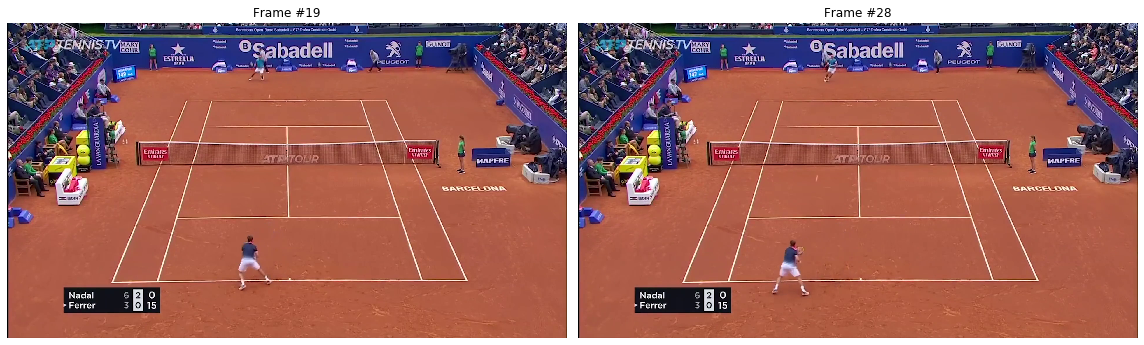

In [7]:
plot_adjacent(video, i=18, j=27, figsize=(16, 10))

In [8]:
!python notebook2script.py 00_utils.ipynb

Converted 00_utils.ipynb to utils.py
